# Jawablah poin-poin assignment berikut
#### perhatikan dengan baik apa yang diminta pada soal

# 1. Anda bekerja sebagai seorang data scientist, atasan anda mengirimkan anda data kepada anda dan meminta untuk memberikan analisa dengan menggunakan :
- semua metode pada proses Exploratory Data Analysis. Lakukan proses Feature Engineering terlebih dahulu dan mengecek secara teliti pada tiap kolom data sembari melakukan data understanding. **(20 Poin)**

## 1.1. Import Library and Data Checking

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
pd.set_option("display.max_columns", None) # show all columns
pd.set_option("display.max_rows", None) # show all rows

In [2]:
df = pd.read_csv('ecommerce.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom


In [3]:
df.shape

(4870, 8)

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


In [6]:
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,4870.000000,4870.000000,4870.000000,4870.000000
mean,560586.577413,12.945791,2.937057,15291.004312
std,13211.347819,38.145988,4.744515,1709.035002
min,536365.000000,1.000000,0.040000,12347.000000
25%,548861.000000,2.000000,1.250000,13975.000000
50%,561895.000000,5.000000,1.950000,15144.000000
75%,572126.000000,12.000000,3.750000,16793.250000
max,581585.000000,992.000000,145.000000,18283.000000


## 1.2. Feature Engineering for EDA

### A. Handling Duplicate

In [7]:
data = df.copy()

In [8]:
len(data.drop_duplicates())/len(data)

1.0

**NO DUPLICATE!!**

### B. Missing Value Checking and Handling

In [9]:
# Method 1
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
# Method 2
data[data.isna().any(axis=1)][data.columns[data.isna().any()]].head()

""


In [11]:
# percentage version, method 3
total_rows = len(data)

# Menghitung dan menampilkan persentase missing values di setiap kolom satu per satu
for column in data.columns:
    missing_count = data[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'InvoiceNo' Has 0 missing values (0.00%)
Column 'StockCode' Has 0 missing values (0.00%)
Column 'Description' Has 0 missing values (0.00%)
Column 'Quantity' Has 0 missing values (0.00%)
Column 'InvoiceDate' Has 0 missing values (0.00%)
Column 'UnitPrice' Has 0 missing values (0.00%)
Column 'CustomerID' Has 0 missing values (0.00%)
Column 'Country' Has 0 missing values (0.00%)


In [12]:
# Method 4
invoice_perc  = 100 * len(data[(data['InvoiceNo'] == -1) | (data['InvoiceNo'].isna())]) / len(data)
stock_perc    = 100 * len(data[data['StockCode'].isin(['-1', 'Unknown'])]) / len(data)
descr_perc = 100 * len(data[data['Description'].isin(['-1', 'Unknown / Non-Applicable'])]) / len(data)

print(invoice_perc, stock_perc, descr_perc)


0.0 0.0 0.0


In [13]:
# Display everything
for col in data.columns:
    print(f"===={col}====")
    print(data[col].value_counts())
    display()

====InvoiceNo====
InvoiceNo
562046    8
575491    7
576339    7
578270    7
559552    6
554275    6
567656    6
570488    6
579196    5
537137    5
579516    5
571909    5
553067    5
565766    5
568346    5
553035    5
571039    5
570672    5
580727    5
578068    5
563924    5
570818    5
567170    4
575607    4
579446    4
545530    4
577504    4
537144    4
571653    4
554098    4
577029    4
551531    4
569653    4
580527    4
572103    4
576857    4
569669    4
544450    4
571046    4
563076    4
546851    4
537868    4
556056    4
580136    4
566290    4
560444    4
558237    4
544316    4
576053    4
574714    4
574481    4
572669    4
544790    4
562031    4
571883    4
568066    4
578045    4
560271    4
566495    4
569803    4
575152    4
545690    4
572741    4
555400    3
544462    3
571281    3
578299    3
566913    3
546982    3
569234    3
543306    3
567462    3
561894    3
573029    3
569469    3
549730    3
565915    3
544463    3
576212    3
578921    3
560504    3


#### Based on checking one by one, there's no missing value

### C. Outlier Handling

In [14]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4870 non-null   int64  
 1   StockCode    4870 non-null   object 
 2   Description  4870 non-null   object 
 3   Quantity     4870 non-null   int64  
 4   InvoiceDate  4870 non-null   object 
 5   UnitPrice    4870 non-null   float64
 6   CustomerID   4870 non-null   int64  
 7   Country      4870 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 304.5+ KB


In [16]:
numerical_data = data.select_dtypes(include='number')
numerical_data.columns

Index(['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [17]:
cols = numerical_data.columns.to_list()
cols

['InvoiceNo', 'Quantity', 'UnitPrice', 'CustomerID']

In [18]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.savefig(f'Dist of {col}.png')
    plt.show()

__Before__

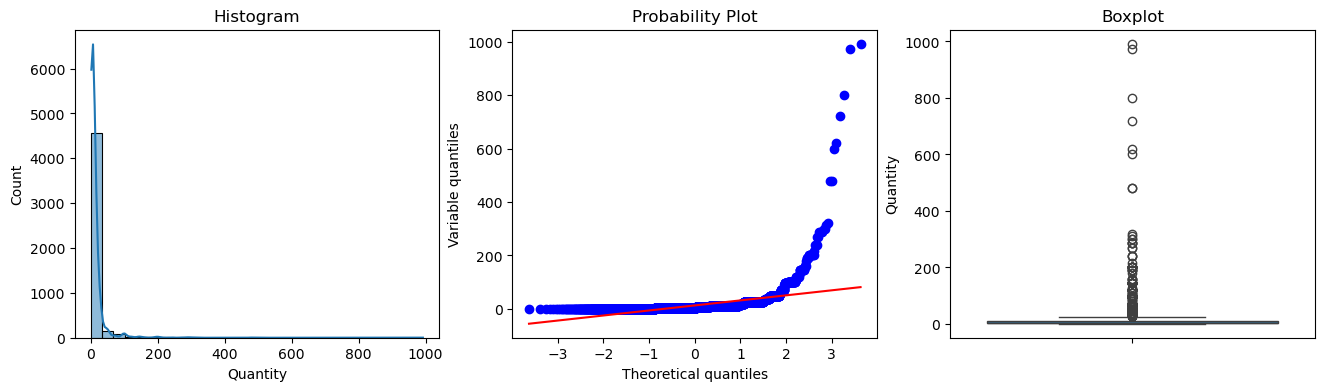

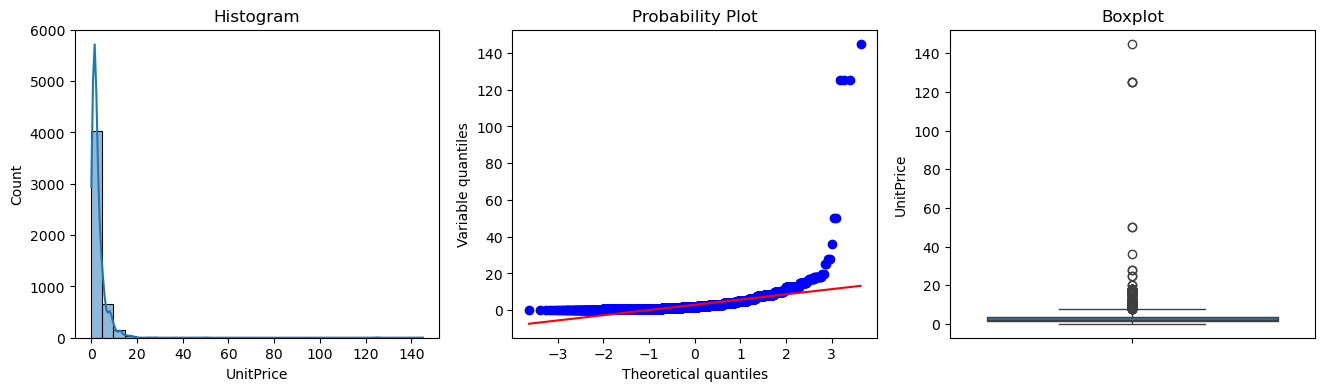

In [19]:
features = ['Quantity', 'UnitPrice']
for col in features:
    check_plot(data, col)

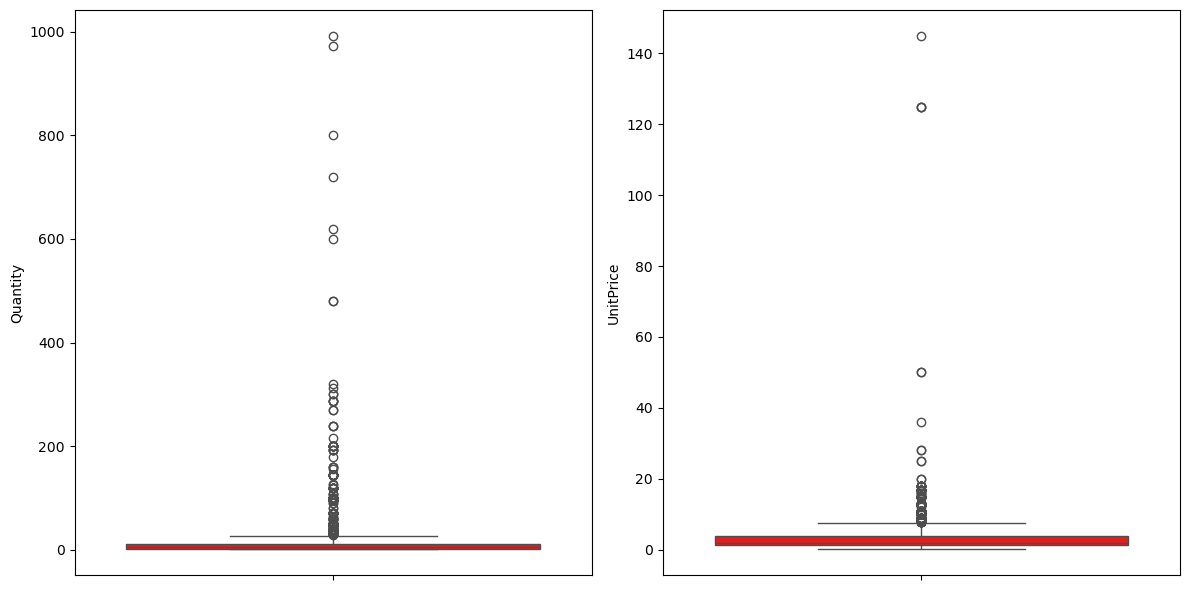

In [20]:
# adjust the figure size for better readability
plt.figure(figsize=(12,6))

# plotting
features = ['Quantity', 'UnitPrice']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

In [21]:
# Handling outlier with IQR
def find_outlier_boundary(df, variable):

    # Mari kita hitung batas luar yang merupakan outlier
    # Rumus IQR: Q3-Q1
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    #LB: Q0 = Q1 - 3/2*IQR, UB: Q4 = Q3 + 3/2*IQR
    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [22]:
filtered_columns_EDA = []

for col in features:
    upper_limit, lower_limit = find_outlier_boundary(data, col)

    # Check if there are values outside the boundary
    is_outlier = (data[col] > upper_limit) | (data[col] < lower_limit)
    
    if is_outlier.any():
        print(f"Column: {col} | Outliers detected | Upper: {upper_limit}, Lower: {lower_limit}")
        data = data[~is_outlier]
        filtered_columns_EDA.append(col)
    else:
        print(f"Column: {col} | No outliers detected. Skipping filtering.")

print("\nColumns that required filtering due to outliers:")
print(filtered_columns_EDA)

Column: Quantity | Outliers detected | Upper: 27.0, Lower: -13.0
Column: UnitPrice | Outliers detected | Upper: 7.5, Lower: -2.5

Columns that required filtering due to outliers:
['Quantity', 'UnitPrice']


__After__

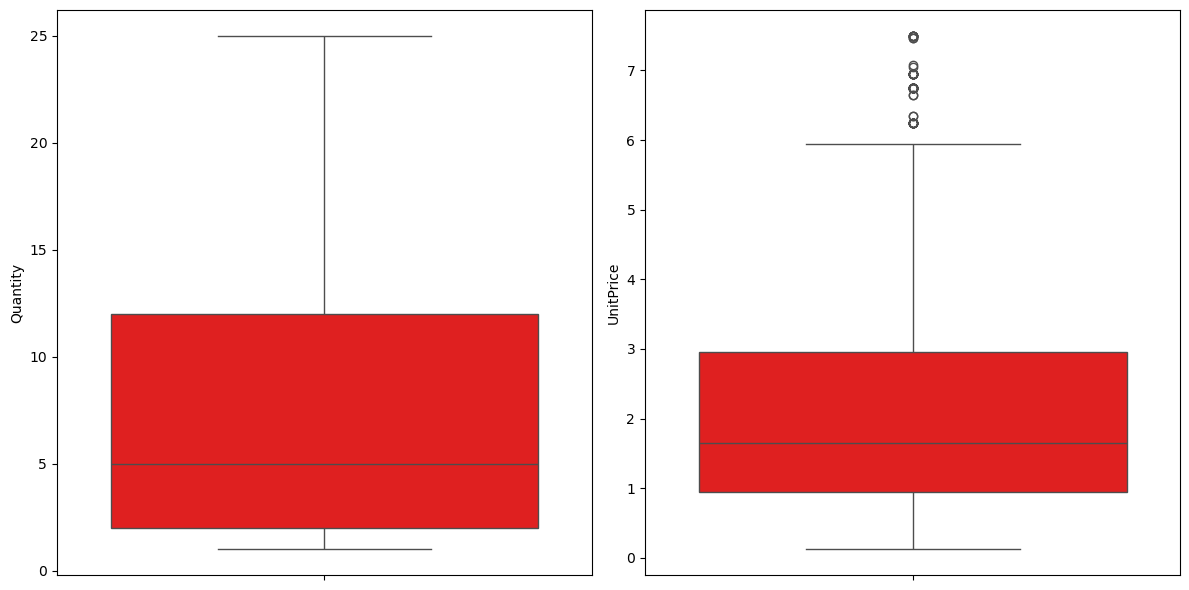

In [23]:
# adjust the figure size for better readability/after outlier handling
plt.figure(figsize=(12,6))

# plotting
features = ['Quantity', 'UnitPrice']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='red')
    plt.tight_layout()

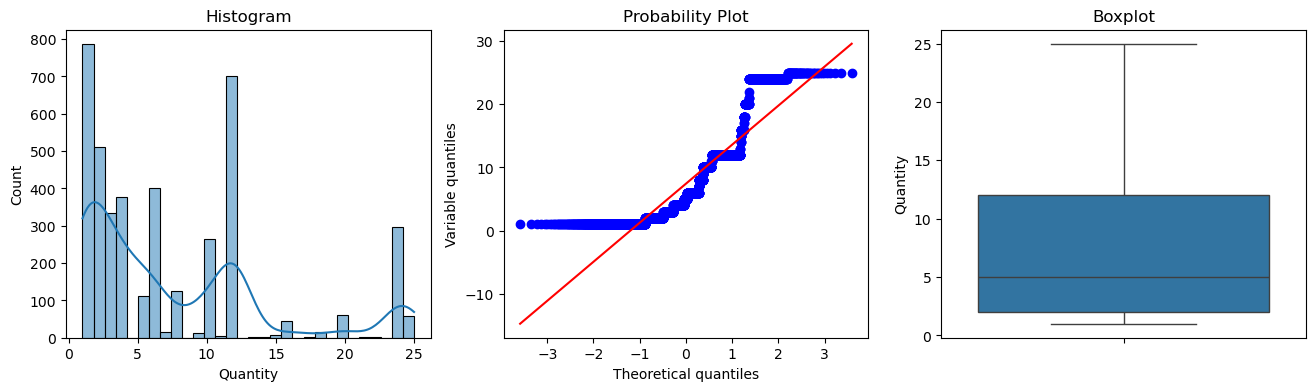

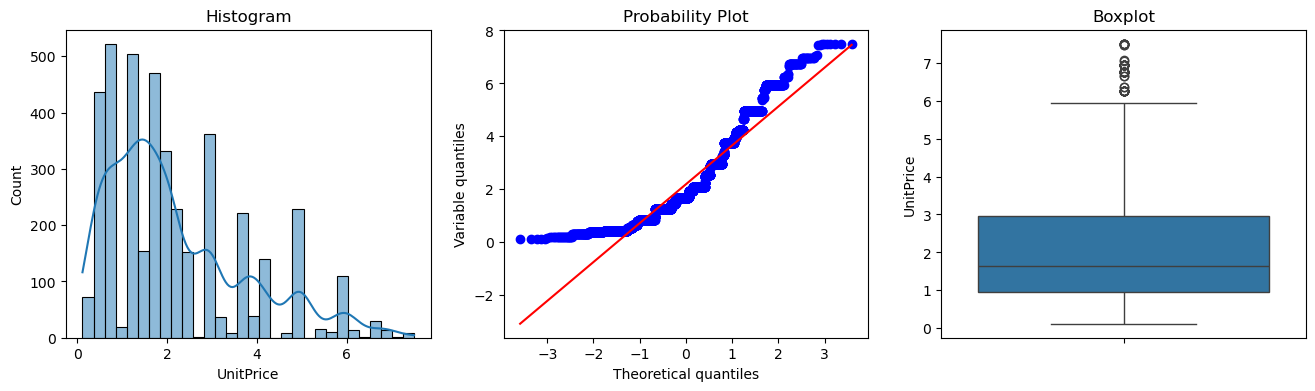

In [24]:
for col in features:
    check_plot(data, col)

In [25]:
categorical_cols = data.select_dtypes(include='object').columns
categorical_cols

Index(['StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4144 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    4144 non-null   int64  
 1   StockCode    4144 non-null   object 
 2   Description  4144 non-null   object 
 3   Quantity     4144 non-null   int64  
 4   InvoiceDate  4144 non-null   object 
 5   UnitPrice    4144 non-null   float64
 6   CustomerID   4144 non-null   int64  
 7   Country      4144 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 291.4+ KB


In [27]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [28]:
data['InvoiceDate'].value_counts().shape

(3236,)

In [29]:
data['Country'].value_counts()#.shape

Country
United Kingdom          3756
Germany                   97
France                    69
EIRE                      69
Switzerland               23
Belgium                   20
Spain                     18
Portugal                  13
Norway                    10
Sweden                     8
Greece                     7
Australia                  7
Austria                    6
Channel Islands            6
Denmark                    4
Finland                    4
Cyprus                     3
Unspecified                3
Singapore                  3
Netherlands                3
Italy                      3
Poland                     2
Israel                     2
Canada                     2
RSA                        1
Japan                      1
Lebanon                    1
United Arab Emirates       1
Iceland                    1
Brazil                     1
Name: count, dtype: int64

In [30]:
data['CustomerID'].value_counts().shape

(1751,)

In [31]:
data['StockCode'].value_counts()#.shape

StockCode
47566      20
85099B     17
84991      17
22720      16
22993      16
22961      15
23203      14
22138      14
23298      14
20724      14
85123A     14
22197      13
22722      13
22726      13
21485      13
21080      13
23202      13
22086      13
20728      12
22383      12
22557      12
22470      12
22384      12
22469      12
82494L     12
85152      12
22382      12
20727      11
21175      11
84879      11
23206      11
21166      10
23355      10
22178      10
22457      10
22386      10
23201      10
22727      10
84946      10
22960      10
22804      10
82482      10
23205       9
23207       9
22139       9
22998       9
21975       9
21181       9
22499       9
23208       9
20725       9
22865       9
23321       9
21034       9
22553       9
23209       9
85099C      9
21790       9
22558       9
23171       9
85099F      8
22630       8
22326       8
23199       8
22577       8
22077       8
20914       8
47590B      8
23084       8
23534       8
22996     

In [32]:
data.shape

(4144, 8)

### D. Encoding

_**OrdinalEncoder**_

In [33]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
data["Country_oe"] = oe.fit_transform(data[["Country"]])
data[['Country', 'Country_oe']].sample(5)

,Country,Country_oe
3898,United Kingdom,28.0
359,United Kingdom,28.0
3960,United Kingdom,28.0
1732,United Kingdom,28.0
3857,United Kingdom,28.0


__*Frequency*__

In [34]:
freq = data["Country"].value_counts(normalize=True)
data["Country_freq"] = data["Country"].map(freq)
data[['Country', 'Country_freq']].head(5)

,Country,Country_freq
0,United Kingdom,0.906371
1,United Kingdom,0.906371
2,United Kingdom,0.906371
3,United Kingdom,0.906371
4,United Kingdom,0.906371


__*LabelEncoder*__

In [35]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = ['StockCode', 'Country', 'CustomerID']

labelEncoder = LabelEncoder()

for col in cols_to_encode:
    new_col = col + '_enc'
    data[new_col] = labelEncoder.fit_transform(data[col])

In [36]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Country_oe,Country_freq,StockCode_enc,Country_enc,CustomerID_enc
0,554697,21166,COOK WITH WINE METAL SIGN,1,5/25/2011 17:31,2.08,14584,United Kingdom,28.0,0.906371,149,28,656
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,7/24/2011 11:58,2.55,17114,United Kingdom,28.0,0.906371,1376,28,1411
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,7/19/2011 12:54,1.65,15311,United Kingdom,28.0,0.906371,1064,28,870
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,7/13/2011 11:34,1.25,16843,United Kingdom,28.0,0.906371,1535,28,1327
4,544450,21789,KIDS RAIN MAC PINK,3,2/20/2011 12:23,0.85,17811,United Kingdom,28.0,0.906371,317,28,1621


### E. Feature Scaling

**With IQR**

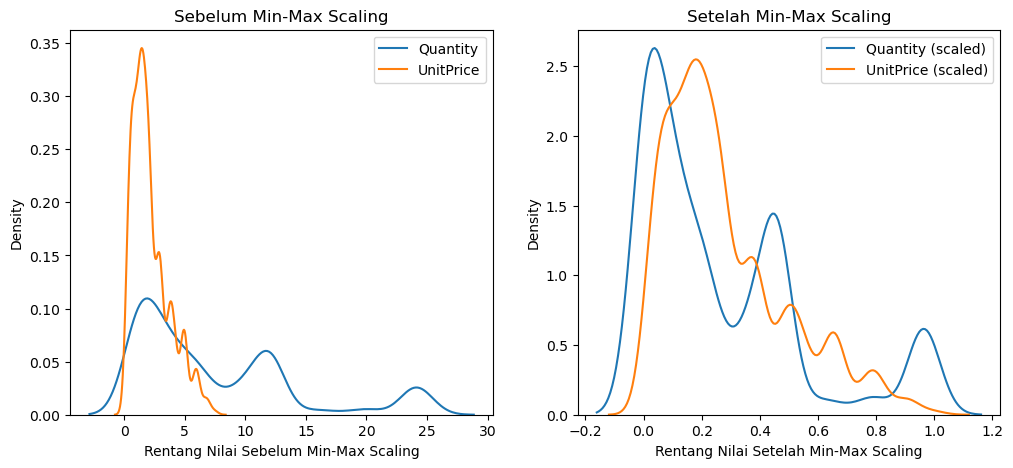

In [37]:
# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
# dataa = df.copy()
columns_to_minmax = ['Quantity', 'UnitPrice']
minmax = MinMaxScaler()
data[['Quantity_minmax', 'UnitPrice_minmax']] = minmax.fit_transform(data[columns_to_minmax])

# Plot dist sblm dan sesudah MinMax Scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Min-Max Scaling
ax1.set_title('Sebelum Min-Max Scaling')
sns.kdeplot(data['Quantity'], ax=ax1, label='Quantity')
sns.kdeplot(data['UnitPrice'], ax=ax1, label='UnitPrice')
# sns.kdeplot(df['Unit price'], ax=ax1, label='Unit price')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Min-Max Scaling')
sns.kdeplot(data['Quantity_minmax'], ax=ax2, label='Quantity (scaled)')
sns.kdeplot(data['UnitPrice_minmax'], ax=ax2, label='UnitPrice (scaled)')
# sns.kdeplot(df['Unit price'], ax=ax1, label='Unit price')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Min-Max Scaling')
ax2.set_xlabel('Rentang Nilai Setelah Min-Max Scaling')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

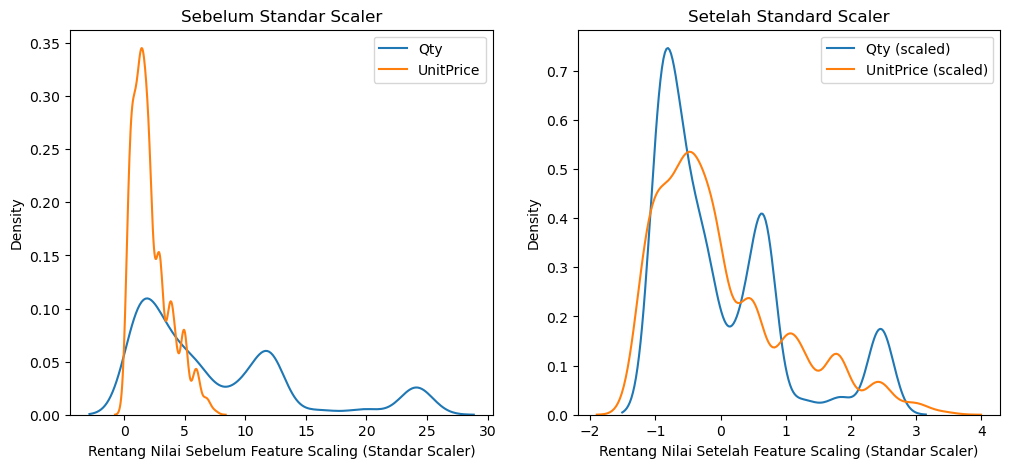

In [38]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
# data1 = df.copy()
columns_to_stdscaler = ['Quantity', 'UnitPrice']
scaler = StandardScaler()
data[['Quantity_stds','UnitPrice_stds']] = scaler.fit_transform(data[columns_to_stdscaler])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Standar Scaler
ax1.set_title('Sebelum Standar Scaler')
sns.kdeplot(data['Quantity'], ax=ax1, label='Qty')
sns.kdeplot(data['UnitPrice'], ax=ax1, label='UnitPrice')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Standard Scaler')
sns.kdeplot(data['Quantity_stds'], ax=ax2, label='Qty (scaled)')
sns.kdeplot(data['UnitPrice_stds'], ax=ax2, label='UnitPrice (scaled)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scaling (Standar Scaler)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scaling (Standar Scaler)')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

**Without IQR**

In [39]:
# MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
dataa = df.copy()
columns_to_minmax = ['Quantity', 'UnitPrice']
minmax = MinMaxScaler()
dataa[['Quantity_minmax', 'UnitPrice_minmax']] = minmax.fit_transform(dataa[columns_to_minmax])

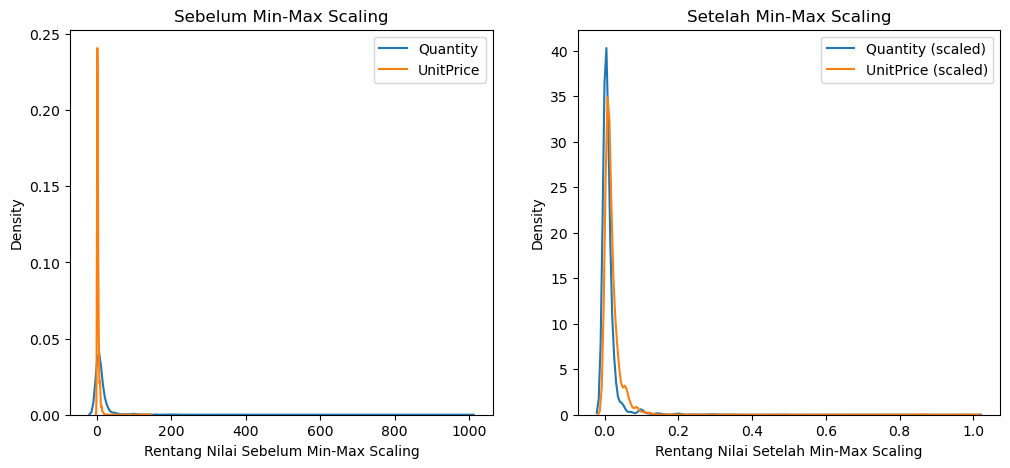

In [40]:
# Plot dist sblm dan sesudah MinMax Scaling
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Min-Max Scaling
ax1.set_title('Sebelum Min-Max Scaling')
sns.kdeplot(dataa['Quantity'], ax=ax1, label='Quantity')
sns.kdeplot(dataa['UnitPrice'], ax=ax1, label='UnitPrice')
# sns.kdeplot(df['Unit price'], ax=ax1, label='Unit price')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Min-Max Scaling')
sns.kdeplot(dataa['Quantity_minmax'], ax=ax2, label='Quantity (scaled)')
sns.kdeplot(dataa['UnitPrice_minmax'], ax=ax2, label='UnitPrice (scaled)')
# sns.kdeplot(df['Unit price'], ax=ax1, label='Unit price')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Min-Max Scaling')
ax2.set_xlabel('Rentang Nilai Setelah Min-Max Scaling')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

In [41]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
data1 = df.copy()
columns_to_stdscaler = ['Quantity', 'UnitPrice']
scaler = StandardScaler()
data1[['Quantity_stds','UnitPrice_stds']] = scaler.fit_transform(data1[columns_to_stdscaler])

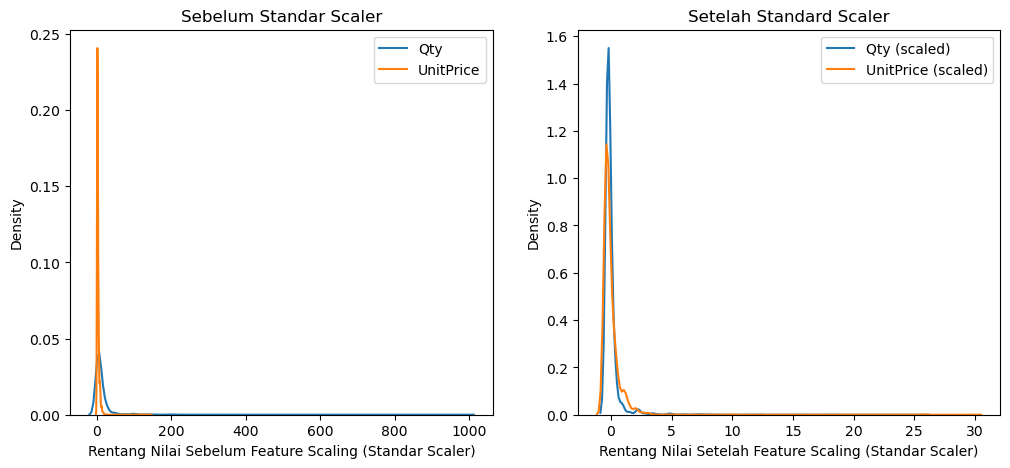

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Standar Scaler
ax1.set_title('Sebelum Standar Scaler')
sns.kdeplot(data1['Quantity'], ax=ax1, label='Qty')
sns.kdeplot(data1['UnitPrice'], ax=ax1, label='UnitPrice')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Standard Scaler')
sns.kdeplot(data1['Quantity_stds'], ax=ax2, label='Qty (scaled)')
sns.kdeplot(data1['UnitPrice_stds'], ax=ax2, label='UnitPrice (scaled)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scaling (Standar Scaler)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scaling (Standar Scaler)')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

Setelah `IQR`, variabel `Quantity` dan `UnitPrice` rentangnya antara -2 hingga 30, kemudian menggunakan minmax scaling menghasilkan rentang -0.2 hingga 1.2. sedangkan Standard scaling menghasilkan rentang -2 hingga 4
Sebelum filter `IQR`, rentang 0 hingga 1000, minmax scaling menghasilkan rentang 0 ke 1, standard scaling menghasilkan rentang 0 hingga 30

Karena `Quantity` dan `UnitPrice` awalnya memiliki outlier besar, dan distribusinya positive-skewed, maka:

- Lakukan IQR filtering terlebih dahulu
- Kemudian gunakan StandardScaler sebagai pilihan utama (karena lebih informatif untuk melihat sebaran/distribusi)
- Gunakan MinMaxScaler hanya jika model kamu butuh nilai [0,1] (misalnya input ke neural network)

# 2. Setelah melakukan feature engineering, Ikuti anjuran berikut :
- Buat 5 pertanyaan analisa
- jawab dengan pendekatan metode data manipulation (sorting, filtering, group by, pivot, melt, crosstab, working with datetime, dsb sesuaikan dengan keperluan anda)
- Buatlah visualisasi grafik supaya mempermudah dalam ekstraksi insight setelah menjawab menggunakan metode data manipulation diatas
- Tulis insight anda

`poin` :
- insight / observation : **10 poin (1 pertanyaan 2 poin)**
- pertanyaan analisis dan jawaban metode data manipulation : **30 poin (1 pertanyaan 7 poin)**
- data visualisasi : **30 poin (1 visualisasi dari 1 pertanyaan 7 poin)**

In [43]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4144 entries, 0 to 4869
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         4144 non-null   int64  
 1   StockCode         4144 non-null   object 
 2   Description       4144 non-null   object 
 3   Quantity          4144 non-null   int64  
 4   InvoiceDate       4144 non-null   object 
 5   UnitPrice         4144 non-null   float64
 6   CustomerID        4144 non-null   int64  
 7   Country           4144 non-null   object 
 8   Country_oe        4144 non-null   float64
 9   Country_freq      4144 non-null   float64
 10  StockCode_enc     4144 non-null   int64  
 11  Country_enc       4144 non-null   int64  
 12  CustomerID_enc    4144 non-null   int64  
 13  Quantity_minmax   4144 non-null   float64
 14  UnitPrice_minmax  4144 non-null   float64
 15  Quantity_stds     4144 non-null   float64
 16  UnitPrice_stds    4144 non-null   float64
dtype

In [45]:
# Ubah InvoiceDate ke datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Hitung Revenue
df["Revenue"] = df["Quantity"] * df["UnitPrice"]

__*Apakah ada hubungan antara InvoiceNo yang repeated dengan InvoiceDate atau CustomerID?*__

In [46]:
# Hitung frekuensi setiap InvoiceNo
invoice_freq = df["InvoiceNo"].value_counts()

# InvoiceNo yang muncul lebih dari sekali
repeated_invoices = invoice_freq[invoice_freq > 1].index

# Contoh detail untuk beberapa InvoiceNo berulang
sample_check = (
    df.loc[df["InvoiceNo"].isin(repeated_invoices),
           ["InvoiceNo", "InvoiceDate", "CustomerID"]]
    .sort_values(["InvoiceNo", "InvoiceDate"])
    .head(20)                     # tampilkan 20 baris pertama
)
print(sample_check)

# Jika ingin mengecek apakah setiap InvoiceNo unik pada kombinasi
# (InvoiceDate, CustomerID):
dupe_check = (
    df.groupby("InvoiceNo")[["InvoiceDate", "CustomerID"]]
      .nunique()
      .rename(columns={"InvoiceDate":"n_dates",
                       "CustomerID":"n_customers"})
)
print(dupe_check.describe())

      InvoiceNo         InvoiceDate  CustomerID
1613     536446 2010-12-01 12:15:00       15983
3902     536446 2010-12-01 12:15:00       15983
3882     536597 2010-12-01 17:35:00       18011
4639     536597 2010-12-01 17:35:00       18011
671      536769 2010-12-02 14:47:00       17581
1676     536769 2010-12-02 14:47:00       17581
1465     536782 2010-12-02 15:18:00       17567
3303     536782 2010-12-02 15:18:00       17567
223      536783 2010-12-02 15:19:00       15061
4351     536783 2010-12-02 15:19:00       15061
1516     536874 2010-12-03 11:35:00       16891
4686     536874 2010-12-03 11:35:00       16891
1038     536987 2010-12-03 14:54:00       17198
3409     536987 2010-12-03 14:54:00       17198
1346     537042 2010-12-05 10:45:00       13838
2685     537042 2010-12-05 10:45:00       13838
3929     537058 2010-12-05 11:51:00       13269
4391     537058 2010-12-05 11:51:00       13269
2025     537126 2010-12-05 12:13:00       18118
2062     537126 2010-12-05 12:13:00     

Well, `InvoiceNo`, `InvoiceDate` and `CustomerID` relasinya sesuai yang diperkirakan. Repetisi terjadi karena customer memberi 2 atau lebih jenis produk berbeda pada waktu yang sama.

### Pertanyaan:
1. Customer dari negara mana yang memiliki pembelian terbanyak? Revenue = Qty*UnitPrice, cek top 10?
2. Top 10 deskripsi produk terlaris by revenue
3. Tren pendapatan tiap bulan dalam tahun 2011
4. Average Order Quantity (Total Quantity per Invoice Order di Tiap Negara) - top 10
5. Berapa rata-rata revenue tiap orderan utk top 10 country?

In [47]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,554697,21166,COOK WITH WINE METAL SIGN,1,2011-05-25 17:31:00,2.08,14584,United Kingdom,2.08
1,561038,82482,WOODEN PICTURE FRAME WHITE FINISH,2,2011-07-24 11:58:00,2.55,17114,United Kingdom,5.10
2,560552,23192,BUNDLE OF 3 ALPHABET EXERCISE BOOKS,1,2011-07-19 12:54:00,1.65,15311,United Kingdom,1.65
3,559884,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,12,2011-07-13 11:34:00,1.25,16843,United Kingdom,15.00
4,544450,21789,KIDS RAIN MAC PINK,3,2011-02-20 12:23:00,0.85,17811,United Kingdom,2.55


#### 1. Top 10 Countries Based on Revenue

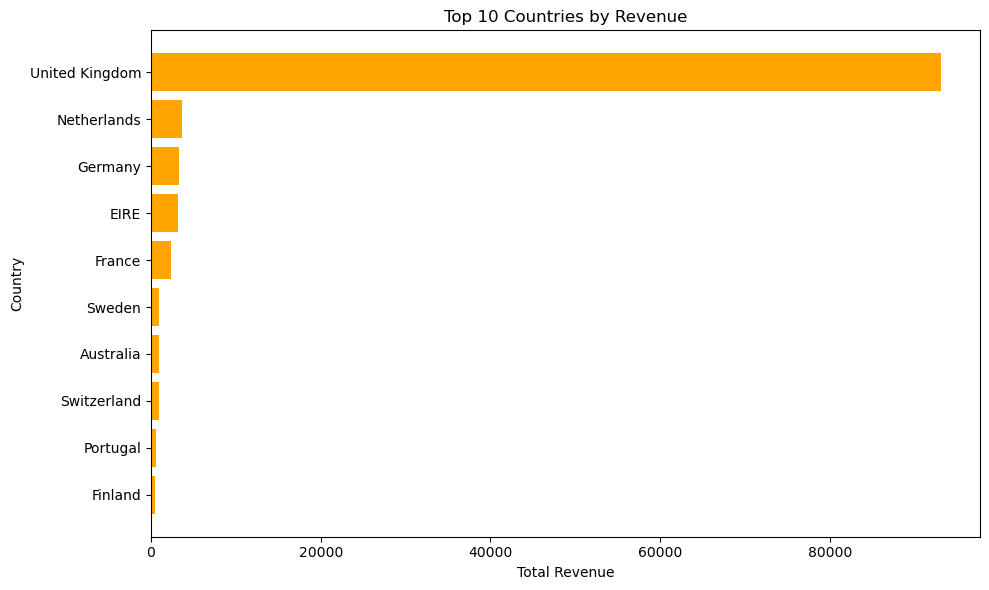

In [48]:
# Top 10 Countries by Revenue
# Total revenue per country
country_revenue = (
    df.groupby("Country", as_index=False)["Revenue"]
      .sum()
      .sort_values("Revenue", ascending=False)
      .head(10)
)

# Plot
plt.figure(figsize=(10,6))
plt.barh(country_revenue["Country"][::-1], country_revenue["Revenue"][::-1], color="orange")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

#### 2. Top 10 Products by Revenue

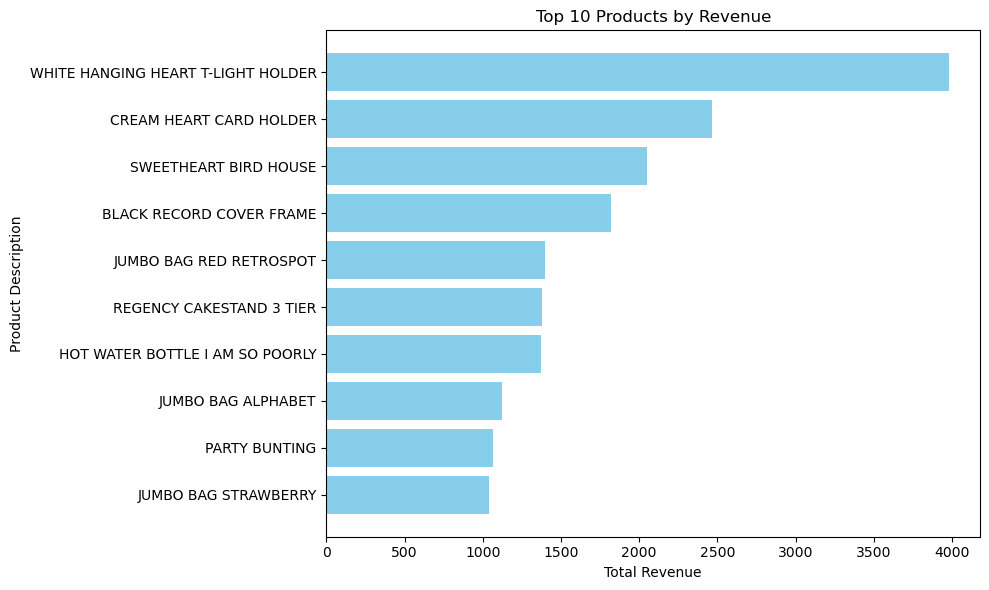

In [49]:
# Top 10 Products based on Revenue
top_products = (
    df.groupby("Description", as_index=False)["Revenue"]
      .sum()
      .sort_values("Revenue", ascending=False)
      .head(10)
)

# Plot
plt.figure(figsize=(10,6))
plt.barh(top_products["Description"][::-1], top_products["Revenue"][::-1], color="skyblue")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Description")
plt.tight_layout()
plt.show()

#### 3. Monthly Revenue Trend in 2011

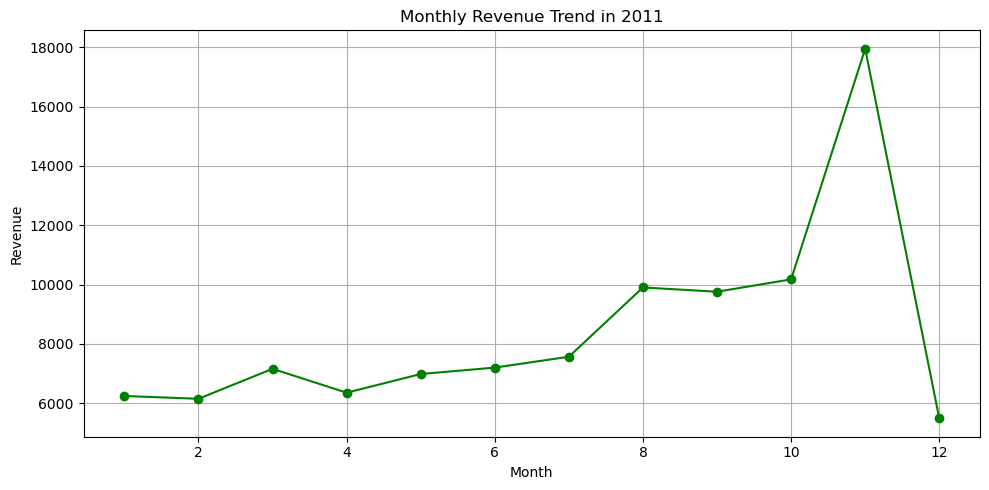

In [50]:
# Trend pendapatan bulanan tahun 2011
df["Year"] = df["InvoiceDate"].dt.year
df["Month"] = df["InvoiceDate"].dt.month
df_2011 = df[df["Year"] == 2011]

# Group by month
monthly_2011 = (
    df_2011.groupby("Month", as_index=False)["Revenue"]
           .sum()
           .sort_values("Month")
)

# Plot
plt.figure(figsize=(10,5))
plt.plot(monthly_2011["Month"], monthly_2011["Revenue"], marker='o', color='green')
plt.title("Monthly Revenue Trend in 2011")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.tight_layout()
plt.show()

#### 4. Average Order Quantity (Total Quantity per Invoice Order di Tiap Negara)
Berapa rata-rata supply barang yang terjual tiap orderan?

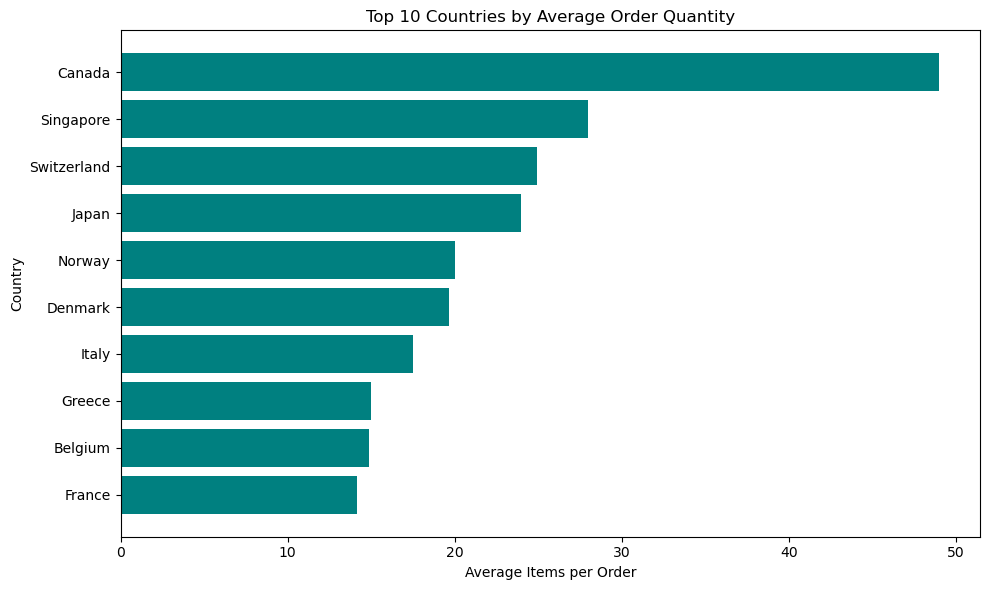

In [51]:
# hitung total quantity per invoice (order) di setiap country
invoice_qty = (
    data.groupby(["InvoiceNo", "Country"], as_index=False)["Quantity"]
      .sum()
      .rename(columns={"Quantity": "OrderQty"})
)

# rata‑rata quantity per order per country
country_aoq = (
    invoice_qty.groupby("Country", as_index=False)["OrderQty"]
               .mean()
               .rename(columns={"OrderQty": "AvgOrderQty"})
               .sort_values("AvgOrderQty", ascending=False)
               .head(10)
)

# plot
plt.figure(figsize=(10,6))
plt.barh(country_aoq["Country"][::-1], country_aoq["AvgOrderQty"][::-1], color="teal")
plt.title("Top 10 Countries by Average Order Quantity")
plt.xlabel("Average Items per Order")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


#### 5. Average Order Value
Berapa rata-rata revenue tiap orderan utk top 10 country?

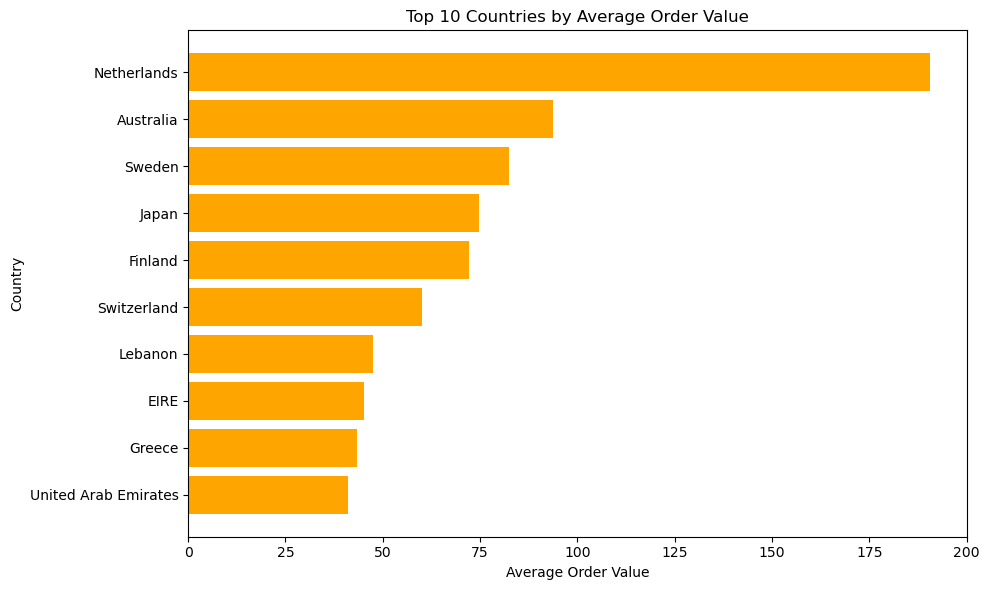

In [52]:
# pastikan kolom Revenue sudah ada: df["Revenue"] = df["Quantity"] * df["UnitPrice"]

# total revenue per invoice
invoice_rev = (
    df.groupby(["InvoiceNo", "Country"], as_index=False)["Revenue"]
      .sum()
      .rename(columns={"Revenue": "OrderValue"})
)

# rata‑rata order value per country
country_aov = (
    invoice_rev.groupby("Country", as_index=False)["OrderValue"]
               .mean()
               .rename(columns={"OrderValue": "AvgOrderValue"})
               .sort_values("AvgOrderValue", ascending=False)
               .head(10)
)

# plot
plt.figure(figsize=(10,6))
plt.barh(country_aov["Country"][::-1], country_aov["AvgOrderValue"][::-1], color="orange")
plt.title("Top 10 Countries by Average Order Value")
plt.xlabel("Average Order Value")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

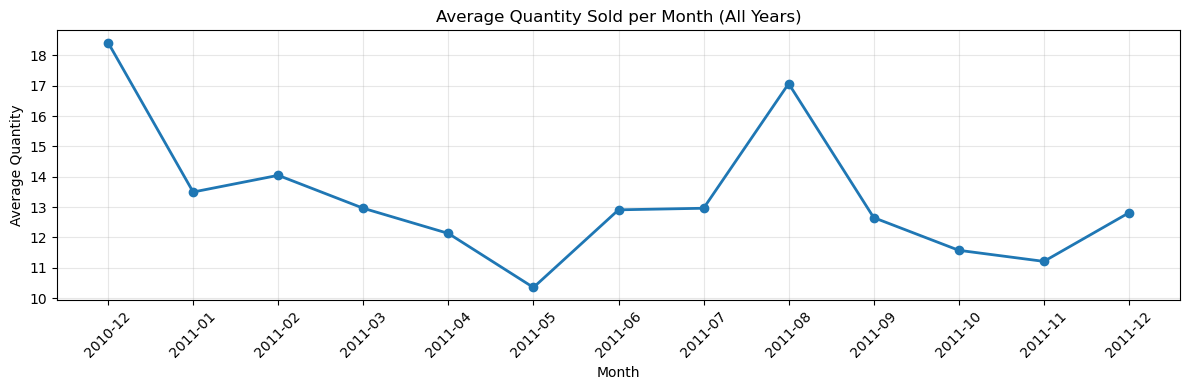

In [53]:
# Bonus
monthly_avg_qty = (
    df.groupby(df["InvoiceDate"].dt.to_period("M"))
      .agg(AvgQty=("Quantity", "mean"))
      .reset_index()
)

plt.figure(figsize=(12,4))
plt.plot(
    monthly_avg_qty["InvoiceDate"].astype(str),   # x‑axis = period label
    monthly_avg_qty["AvgQty"],                    # y‑axis = mean quantity
    marker="o",
    linestyle="-",
    linewidth=2,
)
plt.title("Average Quantity Sold per Month (All Years)")
plt.ylabel("Average Quantity")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

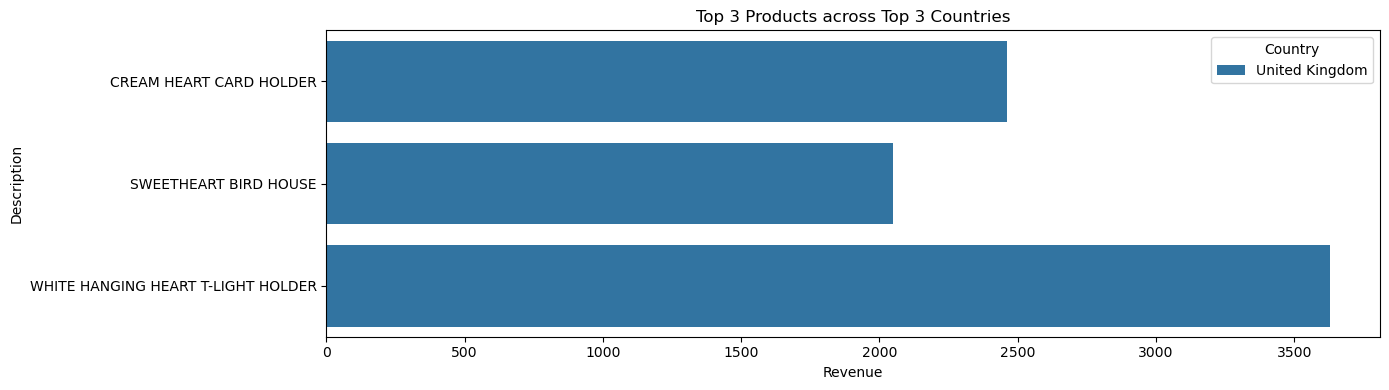

In [54]:
# Top 3 products across top 3 countries
top3_countries = df.groupby("Country")["Revenue"].sum().sort_values(ascending=False).head(3).index
top3_products = df.groupby("Description")["Revenue"].sum().sort_values(ascending=False).head(3).index

df_bar = df[df["Country"].isin(top3_countries) & df["Description"].isin(top3_products)]

# Group dan plot
bar_data = (
    df_bar.groupby(["Country", "Description"])["Revenue"]
          .sum()
          .reset_index()
)

plt.figure(figsize=(14,4))
sns.barplot(data=bar_data, x="Revenue", y="Description", hue="Country")
plt.title("Top 3 Products across Top 3 Countries")
plt.tight_layout()
plt.show()

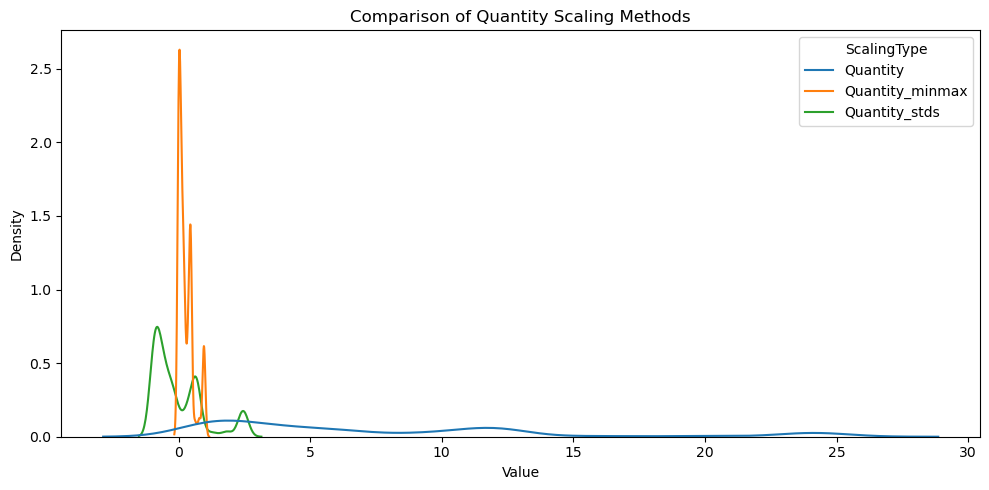

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the scaled versions of Quantity for comparison
melted_qty = data[["Quantity", "Quantity_minmax", "Quantity_stds"]].copy()
melted_qty["Row"] = melted_qty.index
long_qty = melted_qty.melt(id_vars="Row", var_name="ScalingType", value_name="Value")

plt.figure(figsize=(10,5))
sns.kdeplot(data=long_qty, x="Value", hue="ScalingType", common_norm=False)
plt.title("Comparison of Quantity Scaling Methods")
plt.tight_layout()
plt.show()

In [56]:
pivot_price = data.pivot_table(
    index="Description",
    columns="Country",
    values="UnitPrice",
    aggfunc="mean"
).fillna(0)

# Show top 10 by mean across all countries
top10_price = pivot_price.mean(axis=1).sort_values(ascending=False).head(10)
print(pivot_price.loc[top10_price.index])


Country                           Australia  Austria  Belgium  Brazil  Canada  \
Description                                                                     
BLACK/BLUE POLKADOT UMBRELLA           0.00     0.00     0.00     0.0     0.0   
RETROSPOT HEART HOT WATER BOTTLE       0.00     0.00     0.00     0.0     0.0   
PARTY BUNTING                          0.00     0.00     0.00     0.0     0.0   
RETROSPOT TEA SET CERAMIC 11 PC        0.00     0.00     0.00     0.0     0.0   
CHILDRENS CUTLERY DOLLY GIRL           0.00     0.00     4.15     0.0     0.0   
SET OF 3 REGENCY CAKE TINS             0.00     0.00     0.00     0.0     0.0   
BAKING SET 9 PIECE RETROSPOT           4.95     0.00     0.00     0.0     0.0   
SPACEBOY MINI BACKPACK                 0.00     0.00     0.00     0.0     0.0   
CHILDRENS CUTLERY CIRCUS PARADE        0.00     0.00     0.00     0.0     0.0   
EDWARDIAN PARASOL NATURAL              0.00     5.95     0.00     0.0     0.0   

Country                    

In [57]:
cross = pd.crosstab(data["Description"], data["Country"])
cross_top = cross.sum(axis=1).sort_values(ascending=False).head(10)

# Show only top 10 descriptions across countries
print(cross.loc[cross_top.index])


Country                             Australia  Austria  Belgium  Brazil  \
Description                                                               
PARTY BUNTING                               0        0        0       0   
JUMBO BAG RED RETROSPOT                     0        0        0       0   
60 TEATIME FAIRY CAKE CASES                 0        0        0       0   
SET OF 3 CAKE TINS PANTRY DESIGN            0        0        0       0   
SET OF 4 PANTRY JELLY MOULDS                0        0        0       0   
JAM MAKING SET PRINTED                      0        0        0       0   
WHITE HANGING HEART T-LIGHT HOLDER          0        0        0       0   
SPOTTY BUNTING                              0        0        0       0   
RED RETROSPOT CHARLOTTE BAG                 0        0        0       0   
BAKING SET 9 PIECE RETROSPOT                1        0        0       0   

Country                             Canada  Channel Islands  Cyprus  Denmark  \
Description        

In [58]:
encoded_avg = data.groupby("Country_enc")[["UnitPrice_minmax", "UnitPrice_stds"]].mean()
print(encoded_avg.sort_values("UnitPrice_minmax", ascending=False).head())

             UnitPrice_minmax  UnitPrice_stds
Country_enc                                  
22                   0.654472        1.781969
13                   0.559621        1.330540
17                   0.518970        1.137070
0                    0.441541        0.768556
15                   0.392502        0.535164


In [59]:
data.columns.to_list()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country',
 'Country_oe',
 'Country_freq',
 'StockCode_enc',
 'Country_enc',
 'CustomerID_enc',
 'Quantity_minmax',
 'UnitPrice_minmax',
 'Quantity_stds',
 'UnitPrice_stds']

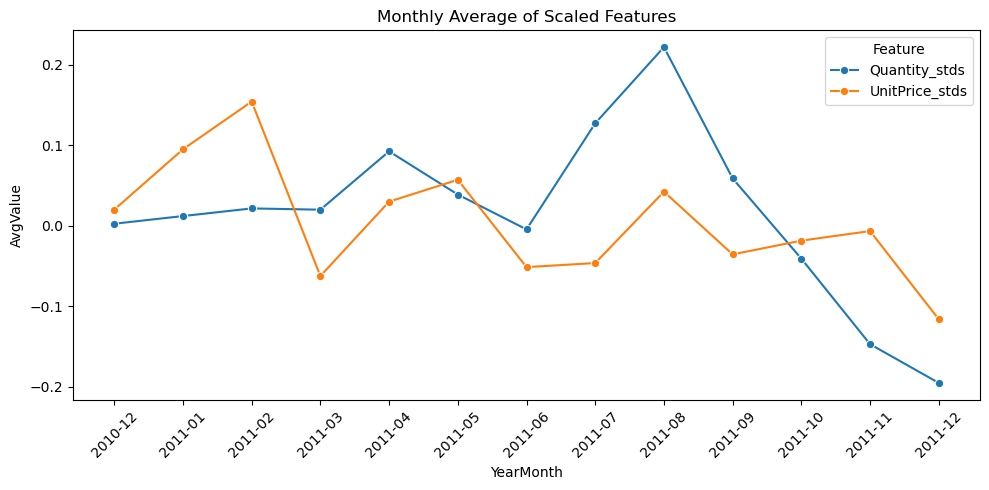

In [60]:
# YearMonth
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data["YearMonth"] = data["InvoiceDate"].dt.to_period("M") 
# — agregasi & reshape seperti sebelumnya —
monthly_scaled = (
    data.groupby("YearMonth")[["Quantity_stds", "UnitPrice_stds"]]
        .mean()
        .reset_index()
)
monthly_long = monthly_scaled.melt(
    id_vars="YearMonth",
    var_name="Feature",
    value_name="AvgValue"
)

# KONVERSI  period[M] ➜ string / datetime
monthly_long["YearMonth"] = monthly_long["YearMonth"].astype(str)     # atau .dt.to_timestamp()

plt.figure(figsize=(10,5))
sns.lineplot(
    data=monthly_long,
    x="YearMonth",
    y="AvgValue",
    hue="Feature",
    marker="o"
)
plt.title("Monthly Average of Scaled Features")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3. Lakukan analisa multivariate pada kolom numerikal berupa :
- Correlation Heatmap + insight / observation **(10 poin)**

In [61]:
# numerical_cols = ['Quantity','UnitPrice','CustomerID']
fcorr = data[features].corr()
fcorr

,Quantity,UnitPrice
Quantity,1.000000,-0.342495
UnitPrice,-0.342495,1.000000


In [62]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Country_oe', 'Country_freq',
       'StockCode_enc', 'Country_enc', 'CustomerID_enc', 'Quantity_minmax',
       'UnitPrice_minmax', 'Quantity_stds', 'UnitPrice_stds', 'YearMonth'],
      dtype='object')

<Axes: >

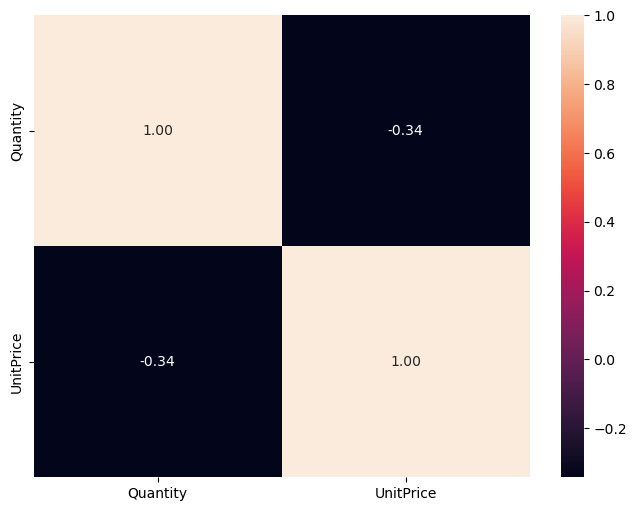

In [63]:
# correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(fcorr, annot=True, fmt='.2f')

Terdapat korelasi negatif antara `UnitPrice` dan `Quantity`. Jumlah kesediaan barang yang tinggi akan membuat harga per unit menurun. Sebaliknya, jika harga per unit yang tinggi, kebanyakan jumlah barang sedikit.